### Importing required Python Libraries

In [414]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # for visualization

import seaborn as sns           # for visualization

from sklearn import preprocessing   # for machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# enable inline plots in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Uploading data file

In [415]:
sales_df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Understanding Data

In [416]:
sales_df.shape

(14204, 12)

In [417]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Preprocessing

#### Exploring the descriptive statistics of the variables

In [418]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking with missing values

In [419]:
# This will give us the total number of missing values feature-wise
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

##### Putting not null values as train data and null values can be used for pridiction of data

### Separating Categorical and Numerical Variables

In [420]:
from tabulate import tabulate               # to print the table
# Seprating out the categorical and continuous variables
def seprate_data_types(sales_df):
    categorical = []
    continuous = []
    for column in sales_df.columns:                # looping on the number of columns
        if sales_df[column].nunique() < 20:       # nunique:  returns unique values in the column,
                                                    #here 20 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(sales_df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


In [421]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {sales_df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {sales_df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {sales_df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if sales_df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [422]:
info_of_cat("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


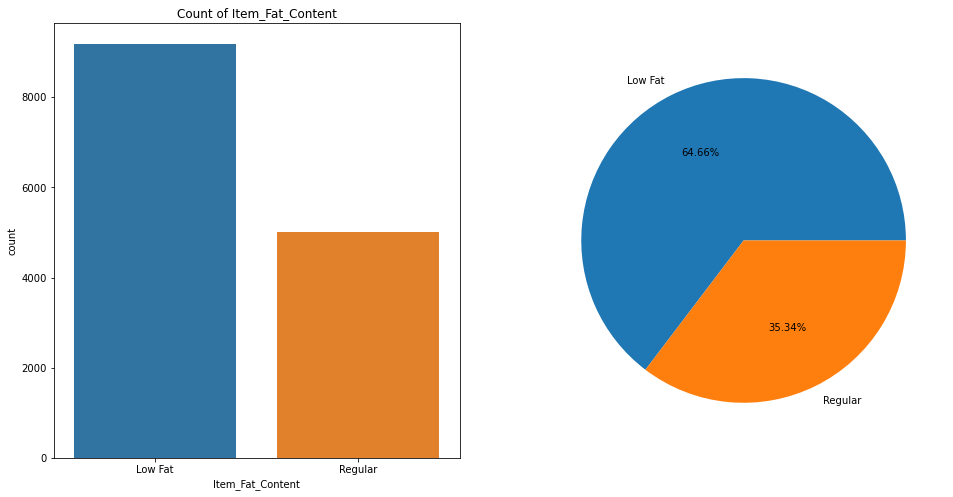

In [423]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title("Count of Item_Fat_Content")
percentage=sales_df["Item_Fat_Content"].value_counts()
labels=list(sales_df["Item_Fat_Content"].value_counts().index)

sns.countplot(x=sales_df["Item_Fat_Content"], ax=ax[0])
plt.pie(percentage,labels=labels, autopct="%0.2f%%")

plt.show()

###### Low fat content has has more sales as if now in the store

In [424]:
info_of_cat("Item_Type")

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


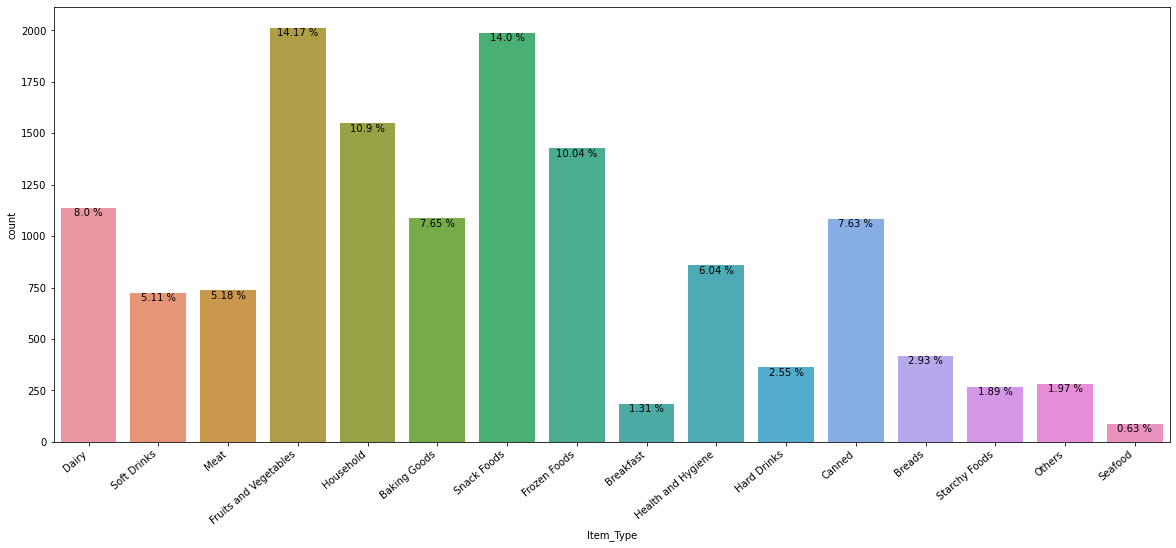

In [425]:
# Plot the graph-
fig, ax = plt.subplots(figsize= (20,8))
ax = sns.countplot(x = sales_df["Item_Type"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(sales_df["Item_Type"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round((bar.get_height()/count)*100, 2)} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()

###### Fruits and Vegetables followed by Snack Foods are more popular in the store

### 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 𝑁𝑢𝑚𝑒𝑟𝑖𝑐𝑎𝑙 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

In [426]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {sales_df[col].mean()}")
    print(f"The median of the {col} is {sales_df[col].median()}")
    print(f"The mode of the {col} is {sales_df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {sales_df[col].std()}")
    print(f"Number of missing values in the {col} is {sales_df[col].isnull().sum()}")

In [427]:
continuous

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales']

#### Weight analysis

In [428]:
info_of_numerical("Item_Weight")

The mean of the Item_Weight is 12.793380385807628
The median of the Item_Weight is 12.6
The mode of the Item_Weight is 17.6
The standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in the Item_Weight is 0


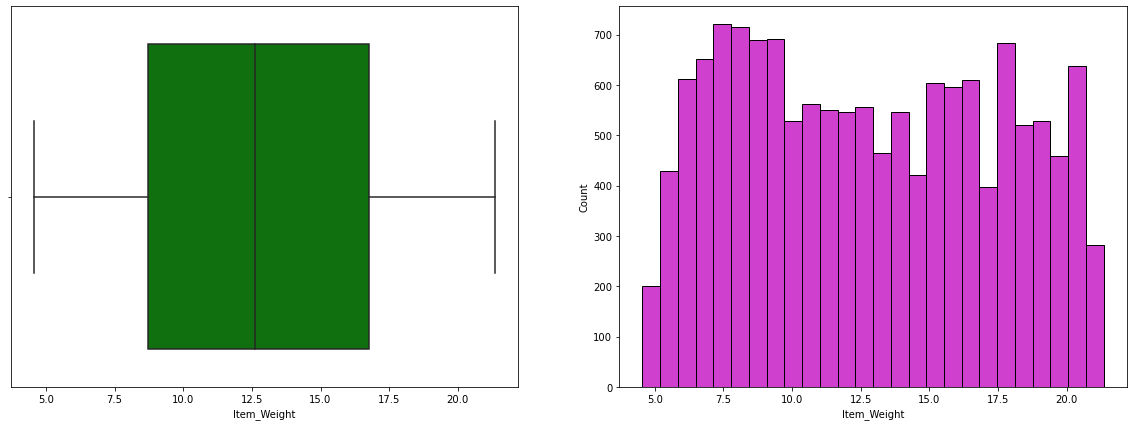

In [429]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = sales_df["Item_Weight"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = sales_df["Item_Weight"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

##### 50% of the weights of the items varies between approximatly 8-17

### Analysis of Item Visibility

In [430]:
info_of_numerical("Item_Visibility")

The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The mode of the Item_Visibility is 0.06470883
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


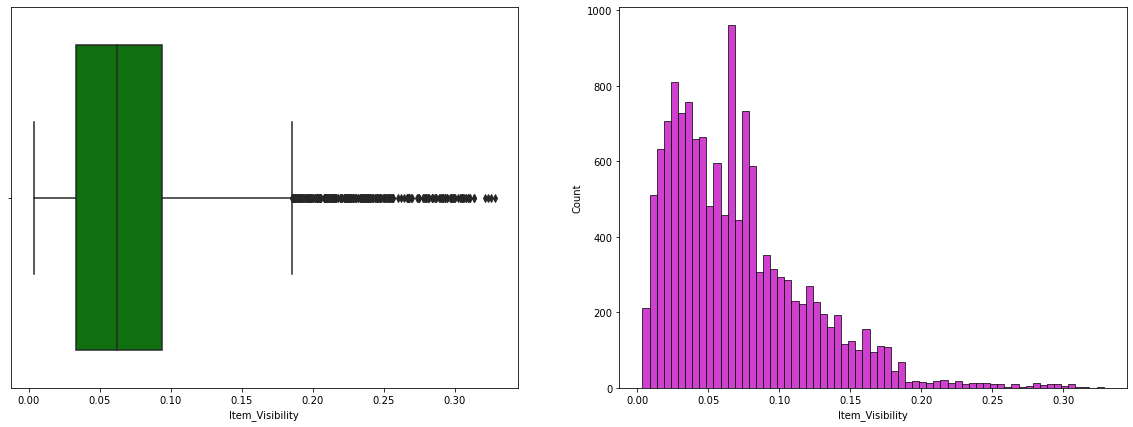

In [431]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = sales_df["Item_Visibility"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = sales_df["Item_Visibility"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

##### As we can clearly see there are many outliers in the visibility of the items

### After Capping

In [432]:
sales_df["Item_Visibility"].quantile(.95)
sales_df["Item_Visibility"]=sales_df["Item_Visibility"].clip(upper=sales_df["Item_Visibility"].quantile(0.95))

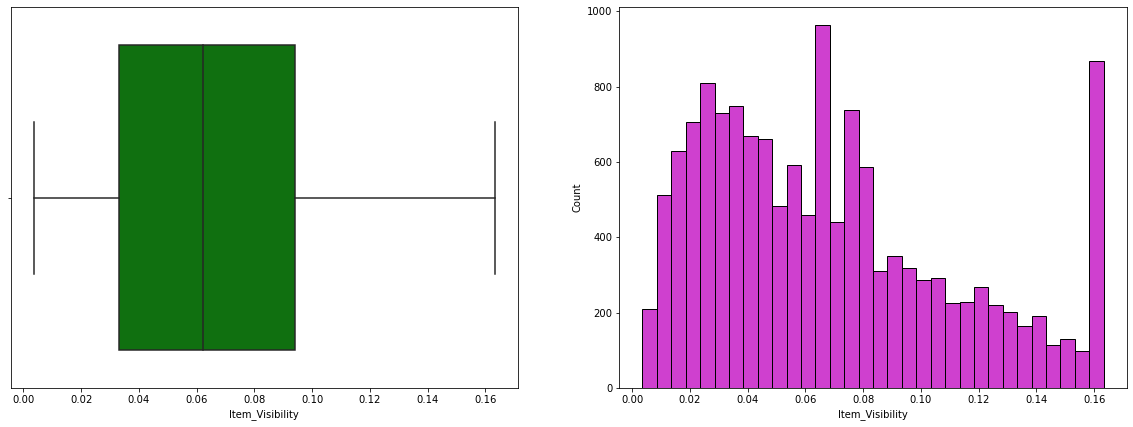

In [433]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = sales_df["Item_Visibility"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = sales_df["Item_Visibility"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

###### Approximately 75% of data have visibility 0.1

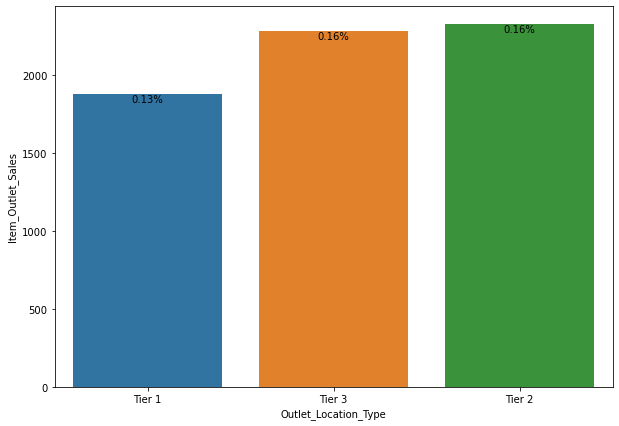

In [434]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=sales_df['Outlet_Location_Type'],y=sales_df['Item_Outlet_Sales'],ci=None,ax=ax)
count=len(sales_df['Item_Fat_Content'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

#### Tier 2 and Tier 3 have almost same sales

## Feature Engineering

In [435]:
# All columns
sales_df_c=sales_df
columns=sales_df_c.columns
columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [436]:
# Converting non-numeric labeled column into categorical column
sales_df_c['Item_Fat_Content']=sales_df_c['Item_Fat_Content'].astype('category')
sales_df_c['Item_Type']=sales_df_c['Item_Type'].astype('category')
sales_df_c['Outlet_Identifier']=sales_df_c['Outlet_Identifier'].astype('category')
sales_df_c['Outlet_Establishment_Year']=sales_df_c['Outlet_Establishment_Year'].astype('category')
sales_df_c['Outlet_Size']=sales_df_c['Outlet_Size'].astype('category')
sales_df_c['Outlet_Location_Type']=sales_df_c['Outlet_Location_Type'].astype('category')
sales_df_c['Outlet_Type']=sales_df_c['Outlet_Type'].astype('category')
print(sales_df_c.head())

print(sales_df_c.dtypes)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.074402   
4           NCD19         8.93          Low Fat         0.064299   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                      1999      Medium               Tier 1   
1                      2009      Medium               Tier 3   
2                      1999      Medium               Tier 1  

In [437]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Item_Fat_Content_encode']= label_encoder.fit_transform(sales_df_c['Item_Fat_Content'])
 
sales_df_c['Item_Fat_Content_encode'].unique()

array([0, 1])

In [438]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Item_Type_encode']= label_encoder.fit_transform(sales_df_c['Item_Type'])
 
sales_df_c['Item_Type_encode'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [439]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Outlet_Identifier_encode']= label_encoder.fit_transform(sales_df_c['Outlet_Identifier'])
 
sales_df_c['Outlet_Identifier_encode'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [440]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Outlet_Establishment_Year_encode']= label_encoder.fit_transform(sales_df_c['Outlet_Establishment_Year'])
 
sales_df_c['Outlet_Establishment_Year_encode'].unique()

array([4, 8, 3, 1, 0, 5, 7, 2, 6], dtype=int64)

In [441]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Outlet_Size_encode']= label_encoder.fit_transform(sales_df_c['Outlet_Size'])
 
sales_df_c['Outlet_Size_encode'].unique()

array([1, 0, 2])

In [442]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Outlet_Location_Type_encode']= label_encoder.fit_transform(sales_df_c['Outlet_Location_Type'])
 
sales_df_c['Outlet_Location_Type_encode'].unique()

array([0, 2, 1])

In [443]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
sales_df_c['Outlet_Type_encode']= label_encoder.fit_transform(sales_df_c['Outlet_Type'])
 
sales_df_c['Outlet_Type_encode'].unique()

array([1, 2, 0, 3])

## Feature Scaling

In [444]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_sales_df_c = sales_df_c.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_sales_df_c.to_numpy()),columns=new_sales_df_c.columns)
  return df_scaled

In [445]:
# scaling the data using MinMax Scaling process
scale = 'minmax' #standard
sales_df_scaled=feature_scale(scale)
sales_df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.078088,0.927507,0.283587,0.0,0.266667,1.000000,0.500,0.5,0.0,0.333333
1,0.081274,0.098316,0.072068,0.031419,1.0,0.933333,0.333333,1.000,0.5,1.0,0.666667
2,0.770765,0.082551,0.468288,0.158115,0.0,0.666667,1.000000,0.500,0.5,0.0,0.333333
3,0.871986,0.443437,0.640093,0.053555,1.0,0.400000,0.000000,0.375,0.5,1.0,0.000000
4,0.260494,0.380182,0.095805,0.073651,0.0,0.600000,0.111111,0.125,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.062118,0.467004,NaN,1.0,0.866667,0.888889,0.250,1.0,0.0,0.333333
14200,0.181304,0.872854,0.585126,NaN,1.0,1.000000,0.333333,1.000,0.5,1.0,0.666667
14201,0.324204,0.437966,0.371199,NaN,0.0,0.533333,0.777778,0.625,1.0,0.5,0.333333
14202,0.639774,0.382747,0.778154,NaN,1.0,0.200000,0.222222,0.875,1.0,0.5,0.333333


In [446]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=sales_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
Item_Weight,1.000000,-0.019415,0.035751,0.013261,-0.033737,0.031884,0.003002,0.000301,0.000944,-0.001719,0.001913
Item_Visibility,-0.019415,1.000000,-0.007112,-0.114122,0.051529,-0.040467,-0.089478,-0.081448,0.022056,-0.015031,-0.139958
Item_MRP,0.035751,-0.007112,1.000000,0.567574,-0.004019,0.043948,-0.000555,0.000302,-0.001305,0.000838,0.000136
Item_Outlet_Sales,0.013261,-0.114122,0.567574,1.000000,0.018719,0.017048,0.162325,-0.025525,-0.060517,0.089367,0.401522
Item_Fat_Content_encode,-0.033737,0.051529,-0.004019,0.018719,1.000000,-0.147733,-0.001095,0.000142,-0.000827,0.001373,-0.000228
Item_Type_encode,0.031884,-0.040467,0.043948,0.017048,-0.147733,1.000000,0.001126,0.003295,-0.001080,0.002083,0.004305
Outlet_Identifier_encode,0.003002,-0.089478,-0.000555,0.162325,-0.001095,0.001126,1.000000,-0.030948,0.423623,-0.716151,0.099899
Outlet_Establishment_Year_encode,0.000301,-0.081448,0.000302,-0.025525,0.000142,0.003295,-0.030948,1.000000,0.323491,0.041889,-0.040255
Outlet_Size_encode,0.000944,0.022056,-0.001305,-0.060517,-0.000827,-0.001080,0.423623,0.323491,1.000000,-0.590677,-0.260496
Outlet_Location_Type_encode,-0.001719,-0.015031,0.000838,0.089367,0.001373,0.002083,-0.716151,0.041889,-0.590677,1.000000,0.467251


### As we can see Item visibility, Item MRP,Outlet Identifier and Outlet type are highly correlated

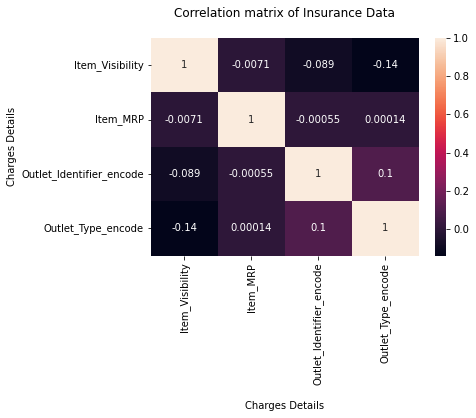

In [447]:
new_df_scaled=sales_df_scaled[['Item_Visibility','Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nCharges Details', ylabel='Charges Details', title = "Correlation matrix of Insurance Data\n")
plt.show()

#### Data Visualization to present the data

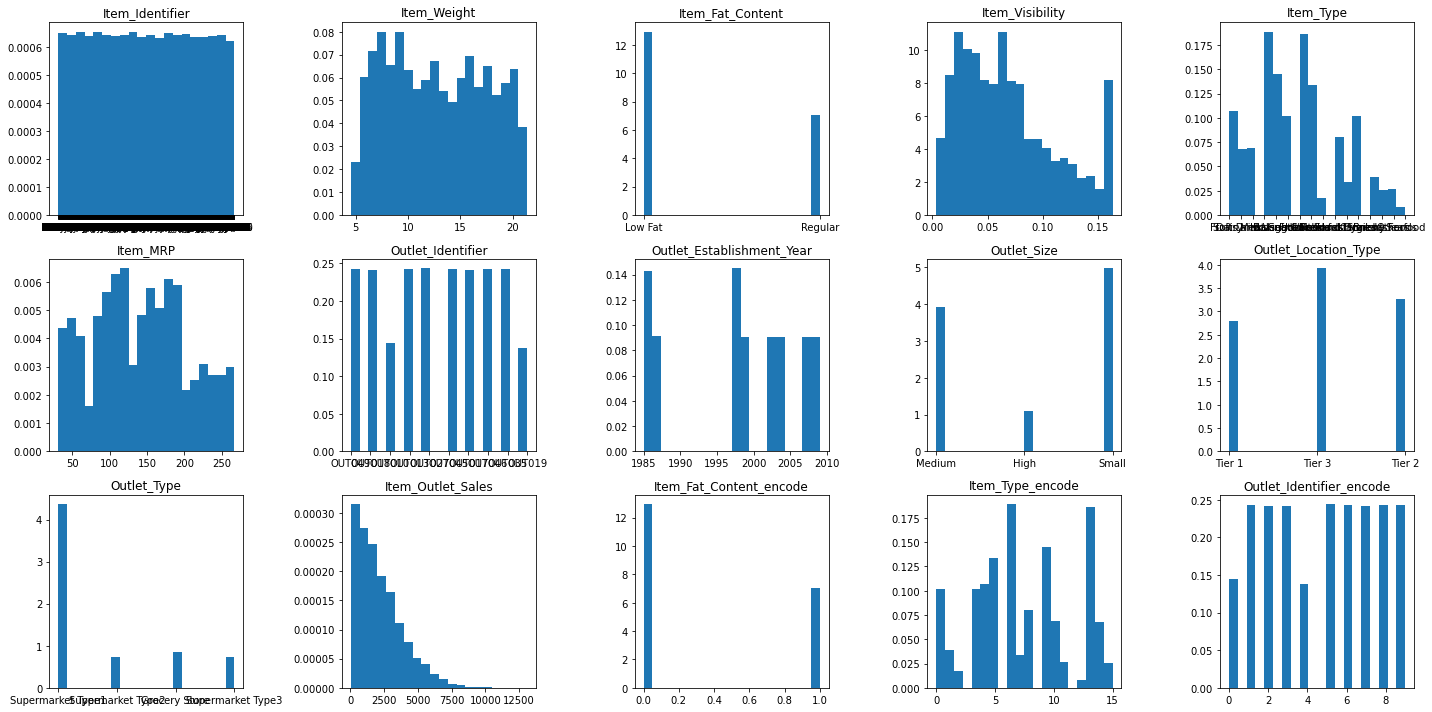

In [448]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = sales_df_c.select_dtypes(include=numerics)
numeric_cols=sales_df_c.columns
num_cols=5
n_bins = 20

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(sales_df_c[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

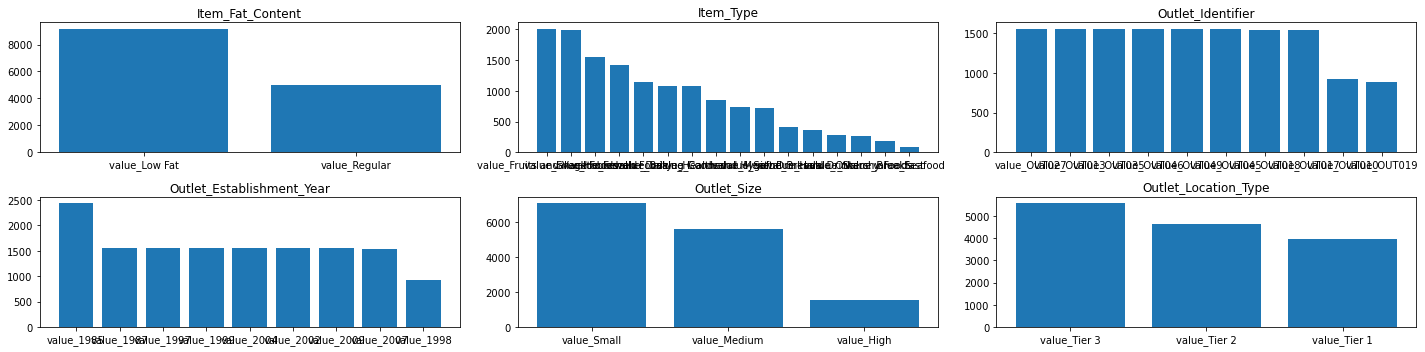

In [449]:
# Histogram of all categorical features
num_cols = 3
cat_sal = sales_df_c.select_dtypes('category')
categorical_cols=cat_sal.columns
# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_sal[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

### Splitting data into train and test

In [450]:
train=sales_df_scaled[~sales_df_scaled['Item_Outlet_Sales'].isnull()]

In [451]:
test=sales_df_scaled[sales_df_scaled['Item_Outlet_Sales'].isnull()]

In [458]:
X_train=train.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_train=train['Item_Outlet_Sales']

## Create the regression

In [459]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(X_train,y_train)

LinearRegression()

In [460]:
c_r_sq=reg.score(X_train, y_train)
print('coefficient of determination:', c_r_sq)

coefficient of determination: 0.5007280107730437


In [461]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-0.059129512061300155

In [462]:
# Obtain the (coefficients) of the regression
reg.coef_


array([ 0.28077289,  0.04900512,  0.18926866, -0.02098742])

## Testing

In [463]:
X_test=test.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_test=test['Item_Outlet_Sales']

In [464]:
X_test.shape

(5681, 4)

In [465]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(X_train)

In [466]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.365807
1,1.106892
2,1.200473
3,1.117713
4,1.028730


In [467]:
y_train.shape

(8523,)

In [468]:
rf_score=reg.score(X_train,y_train)
rf_rmse=np.sqrt(mean_squared_error(y_train,y_hat_test))
print(rf_score)
print(rf_rmse)

0.5007280107730437
0.09236693380721986


### Build DecisionTreeRegressor model

In [469]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

In [470]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

R-Squared on train dataset=0.5843936981220915


In [471]:
y_hat_test2 = dtm.predict(X_train)

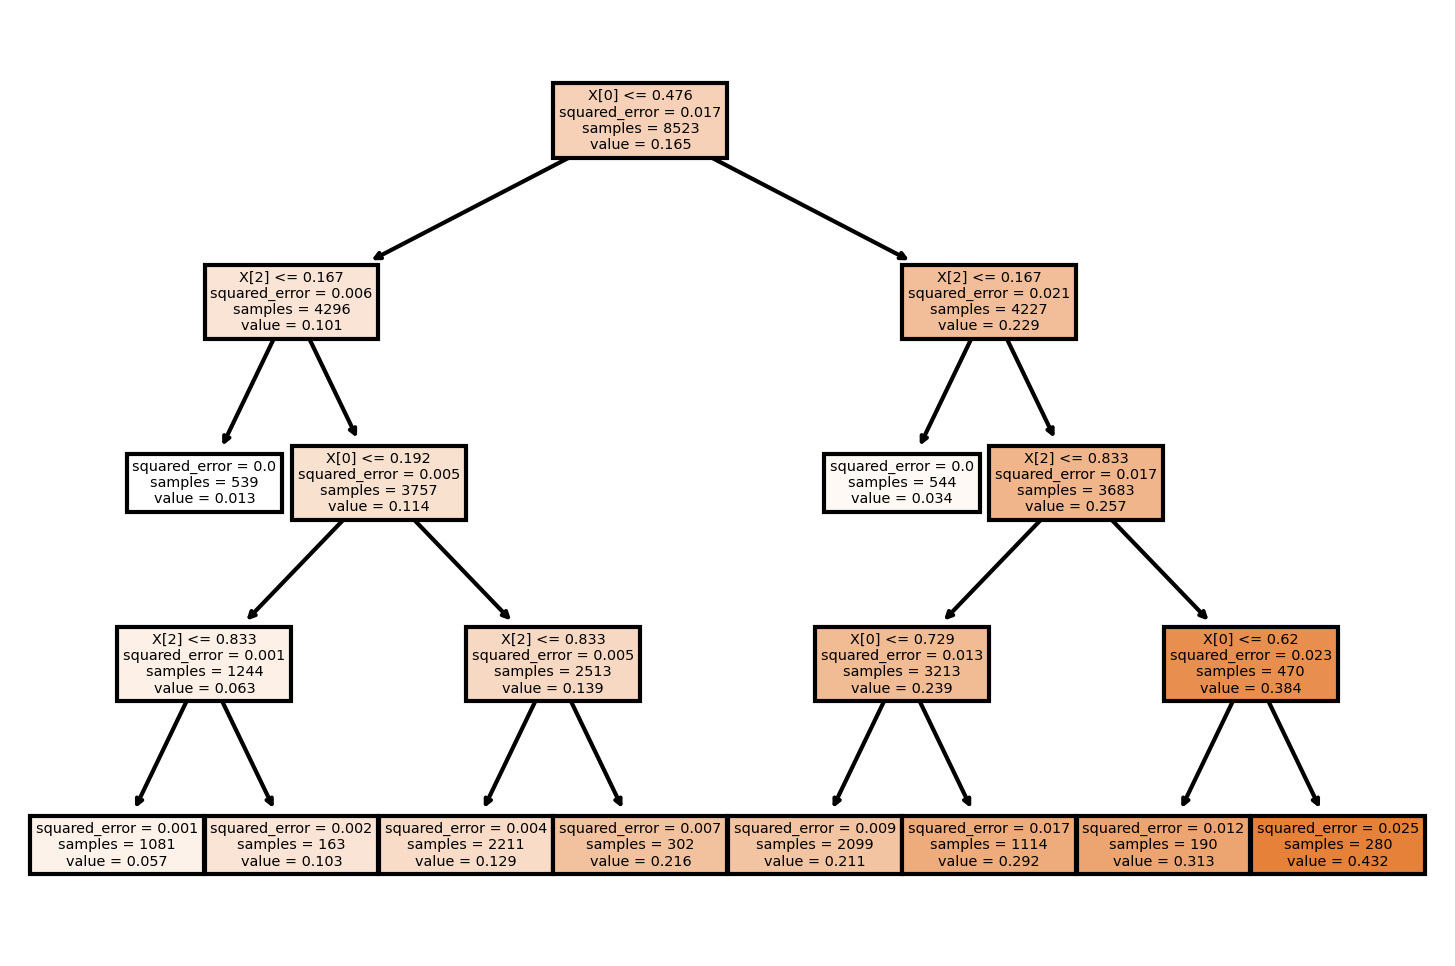

In [472]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')

## Testing of decision tree

In [473]:
y_dec_test = dtm.predict(X_test)

In [474]:
df_pf = pd.DataFrame(np.exp(y_dec_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.137603
1,1.137603
2,1.034124
3,1.234727
4,1.539944


In [475]:
rf_score=dtm.score(X_train,y_train)
rf_rmse2=np.sqrt(mean_squared_error(y_train,y_hat_test2))
print(rf_score)
print(rf_rmse2)

0.5843936981220915
0.08427310362699673


#### Build Random Forest Model

In [476]:
# evaluation imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [477]:
X_train=train.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_train=train['Item_Outlet_Sales']

In [478]:
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [479]:
X_test=test.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_test=test['Item_Outlet_Sales']

In [480]:
y_pred_test=forest.predict(X_test)
y_pred_test

array([0.136878  , 0.07784097, 0.03692135, ..., 0.14010966, 0.26245894,
       0.12243038])

### Hyperparameter tuning for Random Forest using GridSearchCV and fit the data

In [482]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [483]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [484]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV

In [485]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [487]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 4.62 s
Wall time: 1min 35s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [488]:
grid_search.best_score_

0.5963401498843797

In [489]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [490]:
y_hat_test3 = forest.predict(X_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rf_score=forest.score(X_train,y_train)
rf_rmse=np.sqrt(mean_squared_error(y_train,y_hat_test3))
print(rf_score)
print(rf_rmse)

0.9367171841511935
0.0328844682884098


#### Conclusion:
    1. RMSE for linear regression=0.09236693380721986
    2. RMSE for decision tree =0.08427310362699673
    3. RMSE for Random Forest Model=0.0328844682884098
    
we can clearly observe that we have different RMSE values for different model but the model which is having lowest RMSE will be considered as best model so my model for prediction is Random Forest Model